In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Изначальная гипотеза: в час-пик люди не совершают покупки из-за очередей на оффлайн кассах, нужно переводить клиентов на кассы СО. Так быстрее, удобнее и нет очередей

Всё на примере апреля. Остальные месяцы аналогичны, просто не вошли в этот ноутбук

In [2]:
ost_1 = pd.read_csv('1_ost.csv', sep = ';')

In [4]:
df_april = pd.read_csv('1_april.csv', sep = ';')
df_april.CheckUID.nunique()

1670862

Информация о торговых точках

In [5]:
zao = pd.read_csv('zao_info.csv', sep = ';')
zao = zao.rename(columns = {'id_tt' : 'id_tt_cl'})
zao

,id_tt_cl,adress,Hours,Shirota,Dolgota,ploshad,city_tt,Район,shtat,qty_kassa,qty_kassa_so,format
0,10778,"Москва район Ново-Переделкино, ул. Шолохова, д...",с 9-00 до 22-00,55.641888,37.345435,127.2,Москва,Ново-Переделкино,5,6,3,ВкусВилл
1,10780,"Москва Осенний бульвар, д. 12, корп. 6",с 7-00 до 23-30,55.758341,37.413949,111.0,Москва,Крылатское,9,9,3,ВкусВилл
2,10786,"Москва проспект Вернадского, д. 39",с 8-00 до 22-00,55.675544,37.505894,210.0,Москва,Проспект Вернадского,5,8,1,ВкусВилл
3,10904,"Москва ул. 26 Бакинских Комиссаров, д. 8, корп. 2",с 9-00 до 22-00,55.659170,37.491359,114.5,Москва,Тропарево-Никулино,3,5,1,ВкусВилл
4,11020,"Москва ул. Покрышкина, д. 7, корп. 1 + ""ВкусВи...",с 8-00 до 22-00,55.664604,37.468192,200.0,Москва,Тропарево-Никулино,6,8,4,ВкусВилл
...,...,...,...,...,...,...,...,...,...,...,...,...
79,15753,"Москва ш. Боровское, д. 2 к. 5",с 9-00 до 22-00,55.661821,37.419925,182.1,Москва,Солнцево,5,7,3,ВкусВилл
80,15834,"Москва ул. Гжатская, д. 16 к. 1",с 9-00 до 22-00,55.715383,37.435142,174.5,Москва,Можайский,2,4,2,ВкусВилл
81,15970,"Москва Удальцова, дом № 85Б",с 9-00 до 22-00,55.684241,37.489012,224.0,Москва,Проспект Вернадского,2,5,3,ВкусВилл
82,15986,"Москва ул. Кастанаевская, д. 42 к. 2",с 9-00 до 22-00,55.734993,37.474381,304.0,Москва,Фили-Давыдково,6,9,3,ВкусВилл


In [6]:
ch_zao_april = pd.read_csv('ch_zao_april.csv', sep = ';')
ch_zao_april = ch_zao_april.rename(columns = {'id_TT' : 'id_tt_cl'})

Нас не интересует почти ничего кроме выручки, избавляемся от лишних колонок

In [7]:
ch_zao_april = ch_zao_april.drop(['SummCash', 'SummBank', 'SummBonus', 'SummPrePay', 'CashID', 'CashierID', 'ShiftID', 'CashCheckNo', 'BONUSCARD', 'st_months', '_SotrCode'], axis =1)

In [8]:
%%time
final = df_april.merge(ch_zao_april, how = 'left', on = 'CheckUID')
final

Wall time: 6.21 s


,CheckUID,id_tt_cl_x,id_tov_cl,Price_retail,Quantity,BasePrice,BaseSum_x,date_ch,time_ch,order_type,id_tt_cl_y,CloseDate,BaseSum_y,OpenDate,OperationType,cashType,name_Cash_type
0,4BD25902-E1B1-EC11-9064-005056A7A8DF,10780,18168,36.363636,1.000,36.363636,36.363636,2022-04-01,20:13:47,offline,10780,2022-04-01 20:13:47.000,"955,20",2022-04-01 20:11:57.000,1,0.0,Касса Вкусвил
1,A81895A5-D5B1-EC11-9064-005056A7A8DF,10780,18168,36.363636,1.000,36.363636,36.363636,2022-04-01,18:56:55,offline,10780,2022-04-01 18:56:55.000,"1495,00",2022-04-01 18:54:17.000,1,0.0,Касса Вкусвил
2,025A02A0-9BB1-EC11-9064-005056A7A8DF,10780,18172,95.833333,1.000,95.833333,95.833333,2022-04-01,12:05:27,offline,10780,2022-04-01 12:05:27.000,"2020,25",2022-04-01 12:03:45.000,1,1.0,Касса Самообслуживания
3,9A42B854-A2B1-EC11-9064-005056A7A8DF,10780,18175,212.500000,1.000,212.500000,212.500000,2022-04-01,12:48:00,offline,10780,2022-04-01 12:48:00.000,"1454,00",2022-04-01 12:45:43.000,1,0.0,Касса Вкусвил
4,4400036B-ACB1-EC11-9064-005056A7A8DF,10780,18183,46.363636,1.000,46.363636,46.363636,2022-04-01,13:58:45,offline,10780,2022-04-01 13:58:45.000,"483,00",2022-04-01 13:57:50.000,1,1.0,Касса Самообслуживания
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6648514,D57DD186-90C8-EC11-9064-005056A7A8DF,13569,1713,56.363636,1.972,56.361818,111.145455,2022-04-30,17:16:01,online,13569,2022-04-30 17:16:01.000,"1167,66",2022-04-30 17:15:51.000,1,0.0,Касса Вкусвил
6648515,0BB96E28-7FC8-EC11-9064-005056A7A8DF,13569,1723,140.000000,1.000,140.000000,140.000000,2022-04-30,15:12:14,offline,13569,2022-04-30 15:12:14.000,"995,00",2022-04-30 15:10:53.000,1,0.0,Касса Вкусвил
6648516,57C8DC02-64C8-EC11-9064-005056A7A8DF,13569,1764,127.272727,1.000,127.272727,127.272727,2022-04-30,11:53:48,offline,13569,2022-04-30 11:53:48.000,"140,00",2022-04-30 11:51:37.000,1,0.0,Касса Вкусвил
6648517,0DC8137C-93C8-EC11-9064-005056A7A8DF,13569,15000,56.666667,1.000,56.666667,56.666667,2022-04-30,17:40:00,offline,13569,2022-04-30 17:40:00.000,"472,39",2022-04-30 17:38:01.000,1,1.0,Касса Самообслуживания


In [9]:
final = final.drop(['Quantity', 'BasePrice', 'BaseSum_y', 'OperationType', 'id_tt_cl_y'], axis = 1)

In [10]:
print(final.CheckUID.nunique())
print(final.id_tt_cl_x.nunique())
print(final.order_type.nunique())

1670862
84
2


In [11]:
final = final.query('order_type == "offline"').drop(['order_type'], axis = 1)

Форматируем время

In [12]:
%%time
final['CloseDate'] = pd.to_datetime(final['CloseDate'], format='%Y-%m-%d %H:%M:%S')
final['OpenDate'] = pd.to_datetime(final['OpenDate'], format='%Y-%m-%d %H:%M:%S')

Wall time: 8.41 s


In [13]:
%%time
final['date_ch'] = pd.to_datetime(final['date_ch'])
final['time_ch'] = pd.to_datetime(final['time_ch'], format = '%H:%M:%S')

Wall time: 12.1 s


Вытащим номер месяца, недели, дня, часа, минуты. Это понадобится в дальнейшем

In [14]:
final['month'] = final['date_ch'].dt.month
final['week'] = final['date_ch'].dt.week
final['day'] = final['date_ch'].dt.day
final['hour'] = final['time_ch'].dt.hour
final['minute'] = final['CloseDate'].dt.minute

Час-пик пока предположительно. Далее точнее посмотрим. Дни вручную, в будущем стоит воспользоваться встроенными функциями

In [15]:
def time_name(value):
    if 8 <= value <= 9:
        return 'утро'
    elif 12 <= value <= 13:
        return 'обед'
    elif 17 <= value <= 19:
        return 'вечер'
    else:
        return 'не_час_пик'
    
    
def day_of_week(value):
    if value in [4, 11, 18, 25]:
        return 'понедельник'
    elif value in [5, 12, 19, 26]:
        return 'вторник'
    elif value in [6, 13, 20, 27]:
        return 'среда'
    elif value in [7, 14, 21, 28]:
        return 'четверг'
    elif value in [1, 8, 15, 22, 29]:
        return 'пятница'
    elif value in [2, 9, 16, 22, 30]:
        return 'суббота'
    elif value in [3, 10, 17, 24]:
        return 'воскресенье'

In [16]:
%%time
final['time_name'] = final.apply(lambda x: time_name(x['hour']), axis = 1)
final['day_name'] = final.apply(lambda x: day_of_week(x['day']), axis = 1)

Wall time: 4min 38s


Общее количество покупок по дням за месяц:

In [17]:
final

,CheckUID,id_tt_cl_x,id_tov_cl,Price_retail,BaseSum_x,date_ch,time_ch,CloseDate,OpenDate,cashType,name_Cash_type,month,week,day,hour,minute,time_name,day_name
0,4BD25902-E1B1-EC11-9064-005056A7A8DF,10780,18168,36.363636,36.363636,2022-04-01,1900-01-01 20:13:47,2022-04-01 20:13:47,2022-04-01 20:11:57,0.0,Касса Вкусвил,4,13,1,20,13,не_час_пик,пятница
1,A81895A5-D5B1-EC11-9064-005056A7A8DF,10780,18168,36.363636,36.363636,2022-04-01,1900-01-01 18:56:55,2022-04-01 18:56:55,2022-04-01 18:54:17,0.0,Касса Вкусвил,4,13,1,18,56,вечер,пятница
2,025A02A0-9BB1-EC11-9064-005056A7A8DF,10780,18172,95.833333,95.833333,2022-04-01,1900-01-01 12:05:27,2022-04-01 12:05:27,2022-04-01 12:03:45,1.0,Касса Самообслуживания,4,13,1,12,5,обед,пятница
3,9A42B854-A2B1-EC11-9064-005056A7A8DF,10780,18175,212.500000,212.500000,2022-04-01,1900-01-01 12:48:00,2022-04-01 12:48:00,2022-04-01 12:45:43,0.0,Касса Вкусвил,4,13,1,12,48,обед,пятница
4,4400036B-ACB1-EC11-9064-005056A7A8DF,10780,18183,46.363636,46.363636,2022-04-01,1900-01-01 13:58:45,2022-04-01 13:58:45,2022-04-01 13:57:50,1.0,Касса Самообслуживания,4,13,1,13,58,обед,пятница
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6648513,989F77DE-B1C8-EC11-9064-005056A7A8DF,13569,1713,56.363636,79.363636,2022-04-30,1900-01-01 21:12:42,2022-04-30 21:12:42,2022-04-30 21:10:20,0.0,Касса Вкусвил,4,17,30,21,12,не_час_пик,суббота
6648515,0BB96E28-7FC8-EC11-9064-005056A7A8DF,13569,1723,140.000000,140.000000,2022-04-30,1900-01-01 15:12:14,2022-04-30 15:12:14,2022-04-30 15:10:53,0.0,Касса Вкусвил,4,17,30,15,12,не_час_пик,суббота
6648516,57C8DC02-64C8-EC11-9064-005056A7A8DF,13569,1764,127.272727,127.272727,2022-04-30,1900-01-01 11:53:48,2022-04-30 11:53:48,2022-04-30 11:51:37,0.0,Касса Вкусвил,4,17,30,11,53,не_час_пик,суббота
6648517,0DC8137C-93C8-EC11-9064-005056A7A8DF,13569,15000,56.666667,56.666667,2022-04-30,1900-01-01 17:40:00,2022-04-30 17:40:00,2022-04-30 17:38:01,1.0,Касса Самообслуживания,4,17,30,17,40,вечер,суббота


Покупки по дням. Пятница сильно выбивается. Суббота и воскресенье не очень активные дни. Логично

In [18]:
%%time
days = final.groupby('day_name', as_index = False) \
    .agg({'CheckUID' : 'nunique'}) \
    .sort_values('CheckUID', ascending = False)
days

Wall time: 2.81 s


,day_name,CheckUID
3,пятница,293640
4,среда,234595
1,вторник,232569
6,четверг,231460
2,понедельник,225020
5,суббота,186339
0,воскресенье,179705


In [19]:
days = days.rename(columns = {'day_name' : 'День недели', 'CheckUID' : 'Ср. кол-во чеков'})
days

,День недели,Ср. кол-во чеков
3,пятница,293640
4,среда,234595
1,вторник,232569
6,четверг,231460
2,понедельник,225020
5,суббота,186339
0,воскресенье,179705


In [20]:
days_2 = final \
    .groupby('day', as_index = False) \
    .agg({'CheckUID' : 'nunique'}) \
    .sort_values('CheckUID', ascending = False)
days_2
print(sum(days_2.CheckUID))

1637344


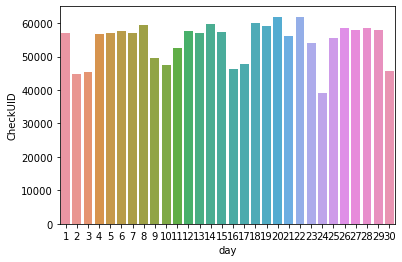

In [21]:
ax = sns.barplot(x = 'day', y = 'CheckUID', data = days_2)

Далее графики по каждому дню. Чтобы понять час-пик. Спойлер: изначально угадал правильно

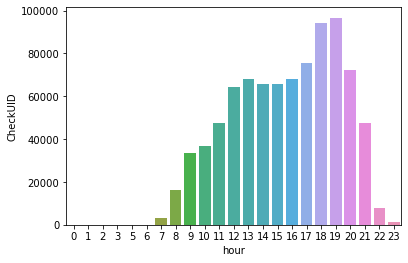

In [22]:
days_mnd = final.query('day_name == "понедельник"') \
    .groupby('hour', as_index = False) \
    .agg({'CheckUID' : 'count'}) \
    .sort_values('hour', ascending = True)

days_tues = final.query('day_name == "вторник"') \
    .groupby('hour', as_index = False) \
    .agg({'CheckUID' : 'count'}) \
    .sort_values('hour', ascending = True)

days_wens = final.query('day_name == "среда"') \
    .groupby('hour', as_index = False) \
    .agg({'CheckUID' : 'count'}) \
    .sort_values('hour', ascending = True)

days_th = final.query('day_name == "четверг"') \
    .groupby('hour', as_index = False) \
    .agg({'CheckUID' : 'count'}) \
    .sort_values('hour', ascending = True)

days_fri = final.query('day_name == "пятница"') \
    .groupby('hour', as_index = False) \
    .agg({'CheckUID' : 'count'}) \
    .sort_values('hour', ascending = True)

days_satur = final.query('day_name == "суббота"') \
    .groupby('hour', as_index = False) \
    .agg({'CheckUID' : 'count'}) \
    .sort_values('hour', ascending = True)

days_sund = final.query('day_name == "воскресенье"') \
    .groupby('hour', as_index = False) \
    .agg({'CheckUID' : 'count'}) \
    .sort_values('hour', ascending = True)

ax_mnd = sns.barplot(x = 'hour', y = 'CheckUID', data = days_mnd)

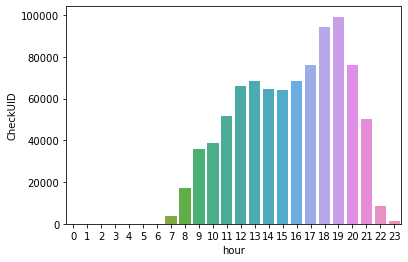

In [23]:
ax_tues = sns.barplot(x = 'hour', y = 'CheckUID', data = days_tues)

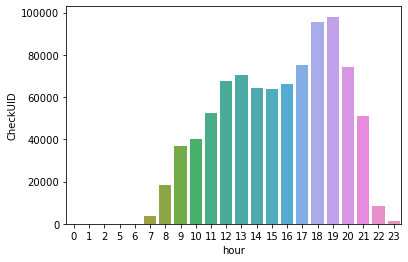

In [24]:
ax_wens = sns.barplot(x = 'hour', y = 'CheckUID', data = days_wens)

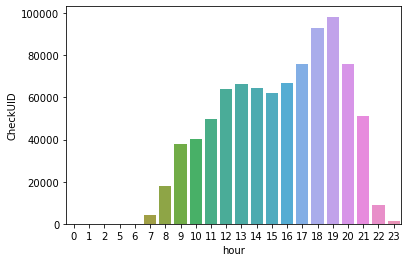

In [25]:
ax_th = sns.barplot(x = 'hour', y = 'CheckUID', data = days_th)

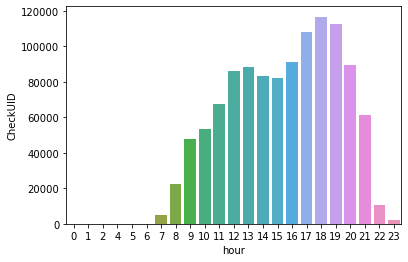

In [26]:
ax_fri = sns.barplot(x = 'hour', y = 'CheckUID', data = days_fri)

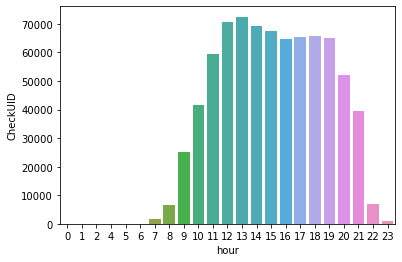

In [27]:
ax_satur = sns.barplot(x = 'hour', y = 'CheckUID', data = days_satur)

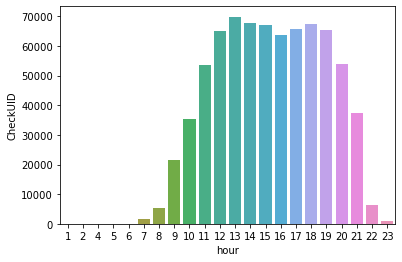

In [28]:
ax_sund = sns.barplot(x = 'hour', y = 'CheckUID', data = days_sund)

График по кол-ву персонала. Хорошо видно группы

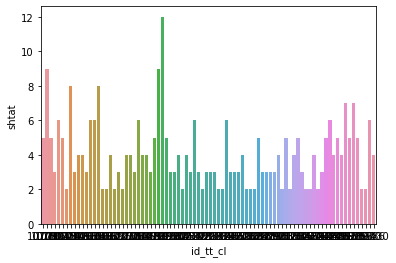

In [29]:
Shtat_m = zao.sort_values('shtat', ascending = False)
ax_shtat_m = sns.barplot(x = 'id_tt_cl', y = 'shtat', data = Shtat_m)

Присвоим статус магазина по кол-ву порсонала

In [30]:
def magazine_status(value):
    if value <= 3:
        return 'junior'
    elif 4 <= value <= 6:
        return 'middle'
    else:
        return 'senior'

In [31]:
%%time
zao['magazine_status'] = zao.apply(lambda x: magazine_status(x['shtat']), axis = 1)

Wall time: 2.02 ms


In [32]:
zao

,id_tt_cl,adress,Hours,Shirota,Dolgota,ploshad,city_tt,Район,shtat,qty_kassa,qty_kassa_so,format,magazine_status
0,10778,"Москва район Ново-Переделкино, ул. Шолохова, д...",с 9-00 до 22-00,55.641888,37.345435,127.2,Москва,Ново-Переделкино,5,6,3,ВкусВилл,middle
1,10780,"Москва Осенний бульвар, д. 12, корп. 6",с 7-00 до 23-30,55.758341,37.413949,111.0,Москва,Крылатское,9,9,3,ВкусВилл,senior
2,10786,"Москва проспект Вернадского, д. 39",с 8-00 до 22-00,55.675544,37.505894,210.0,Москва,Проспект Вернадского,5,8,1,ВкусВилл,middle
3,10904,"Москва ул. 26 Бакинских Комиссаров, д. 8, корп. 2",с 9-00 до 22-00,55.659170,37.491359,114.5,Москва,Тропарево-Никулино,3,5,1,ВкусВилл,junior
4,11020,"Москва ул. Покрышкина, д. 7, корп. 1 + ""ВкусВи...",с 8-00 до 22-00,55.664604,37.468192,200.0,Москва,Тропарево-Никулино,6,8,4,ВкусВилл,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,15753,"Москва ш. Боровское, д. 2 к. 5",с 9-00 до 22-00,55.661821,37.419925,182.1,Москва,Солнцево,5,7,3,ВкусВилл,middle
80,15834,"Москва ул. Гжатская, д. 16 к. 1",с 9-00 до 22-00,55.715383,37.435142,174.5,Москва,Можайский,2,4,2,ВкусВилл,junior
81,15970,"Москва Удальцова, дом № 85Б",с 9-00 до 22-00,55.684241,37.489012,224.0,Москва,Проспект Вернадского,2,5,3,ВкусВилл,junior
82,15986,"Москва ул. Кастанаевская, д. 42 к. 2",с 9-00 до 22-00,55.734993,37.474381,304.0,Москва,Фили-Давыдково,6,9,3,ВкусВилл,middle


In [33]:
zao_count = zao.groupby('magazine_status', as_index = False) \
    .agg({'id_tt_cl' : 'nunique'})
zao_count['%'] = (zao_count['id_tt_cl'] / 84).mul(100).round(2)

Процентное кол-во магазинов

In [34]:
zao_count

,magazine_status,id_tt_cl,%
0,junior,41,48.81
1,middle,36,42.86
2,senior,7,8.33


In [35]:
final = final.rename(columns = {'id_tt_cl_x' : 'id_tt_cl'})
final_table = final.merge(zao, how = 'inner', on = 'id_tt_cl')
final_table

,CheckUID,id_tt_cl,id_tov_cl,Price_retail,BaseSum_x,date_ch,time_ch,CloseDate,OpenDate,cashType,...,Shirota,Dolgota,ploshad,city_tt,Район,shtat,qty_kassa,qty_kassa_so,format,magazine_status
0,4BD25902-E1B1-EC11-9064-005056A7A8DF,10780,18168,36.363636,36.363636,2022-04-01,1900-01-01 20:13:47,2022-04-01 20:13:47,2022-04-01 20:11:57,0.0,...,55.758341,37.413949,111.0,Москва,Крылатское,9,9,3,ВкусВилл,senior
1,A81895A5-D5B1-EC11-9064-005056A7A8DF,10780,18168,36.363636,36.363636,2022-04-01,1900-01-01 18:56:55,2022-04-01 18:56:55,2022-04-01 18:54:17,0.0,...,55.758341,37.413949,111.0,Москва,Крылатское,9,9,3,ВкусВилл,senior
2,025A02A0-9BB1-EC11-9064-005056A7A8DF,10780,18172,95.833333,95.833333,2022-04-01,1900-01-01 12:05:27,2022-04-01 12:05:27,2022-04-01 12:03:45,1.0,...,55.758341,37.413949,111.0,Москва,Крылатское,9,9,3,ВкусВилл,senior
3,9A42B854-A2B1-EC11-9064-005056A7A8DF,10780,18175,212.500000,212.500000,2022-04-01,1900-01-01 12:48:00,2022-04-01 12:48:00,2022-04-01 12:45:43,0.0,...,55.758341,37.413949,111.0,Москва,Крылатское,9,9,3,ВкусВилл,senior
4,4400036B-ACB1-EC11-9064-005056A7A8DF,10780,18183,46.363636,46.363636,2022-04-01,1900-01-01 13:58:45,2022-04-01 13:58:45,2022-04-01 13:57:50,1.0,...,55.758341,37.413949,111.0,Москва,Крылатское,9,9,3,ВкусВилл,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6374006,EEAFBD15-50C8-EC11-9064-005056A7A8DF,16130,16590,468.181818,561.818182,2022-04-30,1900-01-01 09:36:09,2022-04-30 09:36:09,2022-04-30 09:35:03,0.0,...,55.740193,37.434370,230.0,Москва,Кунцево,4,7,3,ВкусВилл,middle
6374007,5CA4635F-91C8-EC11-9064-005056A7A8DF,16130,17650,75.833333,75.833333,2022-04-30,1900-01-01 17:13:06,2022-04-30 17:13:06,2022-04-30 17:11:33,0.0,...,55.740193,37.434370,230.0,Москва,Кунцево,4,7,3,ВкусВилл,middle
6374008,8DD6D30E-51C8-EC11-9064-005056A7A8DF,16130,24800,38.181818,38.181818,2022-04-30,1900-01-01 09:42:18,2022-04-30 09:42:18,2022-04-30 09:41:55,0.0,...,55.740193,37.434370,230.0,Москва,Кунцево,4,7,3,ВкусВилл,middle
6374009,C630836B-6FC8-EC11-9064-005056A7A8DF,16130,24800,38.181818,38.181818,2022-04-30,1900-01-01 13:12:53,2022-04-30 13:12:53,2022-04-30 13:09:47,0.0,...,55.740193,37.434370,230.0,Москва,Кунцево,4,7,3,ВкусВилл,middle


Суммарная выручки, кол-во чеков, средний чек

In [36]:
BaseSum_table = final_table \
    .groupby(['magazine_status'], as_index = False) \
    .agg({'BaseSum_x' : 'sum', 'CheckUID' : 'nunique'})
BaseSum_table['sr'] = BaseSum_table['BaseSum_x']/BaseSum_table['CheckUID']
BaseSum_table

,magazine_status,BaseSum_x,CheckUID,sr
0,junior,2.691395e+08,548664,490.536034
1,middle,4.226545e+08,842135,501.884454
2,senior,1.253189e+08,246545,508.300481


Смотрим разницу срекднего чека по час-пику

In [37]:
table_morn = final_table.query('time_name == "утро"') \
    .groupby(['magazine_status']) \
    .agg({'BaseSum_x' : 'sum', 'CheckUID' : 'nunique'}) 
table_morn['sr'] = table_morn['BaseSum_x'] / table_morn['CheckUID']
table_morn

,BaseSum_x,CheckUID,sr
magazine_status,,,
junior,1.020416e+07,26509,384.931729
middle,2.363321e+07,59335,398.301279
senior,1.008656e+07,24056,419.294798


In [38]:
table_afternon = final_table.query('time_name == "обед"') \
    .groupby(['magazine_status']) \
    .agg({'BaseSum_x' : 'sum', 'CheckUID' : 'nunique'}) 
table_afternon['sr'] = table_afternon['BaseSum_x'] / table_afternon['CheckUID']
table_afternon

,BaseSum_x,CheckUID,sr
magazine_status,,,
junior,4.525025e+07,96093,470.900623
middle,6.710669e+07,135449,495.438802
senior,1.903149e+07,36443,522.226212


In [39]:
table_even = final_table.query('time_name == "вечер"') \
    .groupby(['magazine_status']) \
    .agg({'BaseSum_x' : 'sum', 'CheckUID' : 'nunique'}) 
table_even['sr'] = table_even['BaseSum_x'] / table_even['CheckUID']
table_even

,BaseSum_x,CheckUID,sr
magazine_status,,,
junior,7.997633e+07,154586,517.358164
middle,1.250192e+08,235566,530.718380
senior,3.361031e+07,62654,536.443163


In [40]:
table_no = final_table.query('time_name == "не_час_пик"') \
    .groupby(['magazine_status']) \
    .agg({'BaseSum_x' : 'sum', 'CheckUID' : 'nunique'}) 
table_no['sr'] = table_no['BaseSum_x'] / table_no['CheckUID']
table_no

,BaseSum_x,CheckUID,sr
magazine_status,,,
junior,1.337087e+08,271476,492.525028
middle,2.068954e+08,411785,502.435403
senior,6.259059e+07,123392,507.249958


Вечером самый большой. Здесь могут быть очереди

In [41]:
table_100 = final_table \
    .groupby(['time_name', 'magazine_status']) \
    .agg({'BaseSum_x' : 'sum', 'CheckUID' : 'nunique'}) 
table_100['sr'] = table_100['BaseSum_x'] / table_100['CheckUID']
table_100

BaseSum_x  CheckUID          sr
time_name  magazine_status                                    
вечер      junior           7.997633e+07    154586  517.358164
           middle           1.250192e+08    235566  530.718380
           senior           3.361031e+07     62654  536.443163
не_час_пик junior           1.337087e+08    271476  492.525028
           middle           2.068954e+08    411785  502.435403
           senior           6.259059e+07    123392  507.249958
обед       junior           4.525025e+07     96093  470.900623
           middle           6.710669e+07    135449  495.438802
           senior           1.903149e+07     36443  522.226212
утро       junior           1.020416e+07     26509  384.931729
           middle           2.363321e+07     59335  398.301279
           senior           1.008656e+07     24056  419.294798

In [42]:
aaaaa = final_table.groupby('time_name') \
    .agg({'BaseSum_x' : 'sum'})
aaaaa.T

time_name,вечер,не_час_пик,обед,утро
BaseSum_x,2.386058e+08,4.031947e+08,1.313884e+08,4.392392e+07


In [43]:
final_table.columns

Index(['CheckUID', 'id_tt_cl', 'id_tov_cl', 'Price_retail', 'BaseSum_x',
       'date_ch', 'time_ch', 'CloseDate', 'OpenDate', 'cashType',
       'name_Cash_type', 'month', 'week', 'day', 'hour', 'minute', 'time_name',
       'day_name', 'adress', 'Hours', 'Shirota', 'Dolgota', 'ploshad',
       'city_tt', 'Район', 'shtat', 'qty_kassa', 'qty_kassa_so', 'format',
       'magazine_status'],
      dtype='object')

In [44]:
final_table['qty_kassa'] = final_table['qty_kassa'] - final_table['qty_kassa_so'] 

In [45]:
final_table['kassa_ch'] = (final_table['qty_kassa'] / (final_table['qty_kassa'] + final_table['qty_kassa_so'] )).mul(100).round(0)
final_table['kassa_so'] = (final_table['qty_kassa_so'] / (final_table['qty_kassa'] + final_table['qty_kassa_so'] )).mul(100).round(0)

Соотношение касс оффлайн и СО. Видно, что бизнес стремится к 60 на 40

In [46]:
final_table_kass = final_table.groupby('magazine_status', as_index = False) \
    .agg({'kassa_ch' : 'mean', 'kassa_so' : 'mean'})
final_table_kass

,magazine_status,kassa_ch,kassa_so
0,junior,59.544476,40.455524
1,middle,63.046731,36.953269
2,senior,63.984248,36.015752


Для примера 13 часов дня. Кол-во чеков в течение часа поминутно. Некоторые минуты выпадают. Значит пробивают дольше - потенциальные очереди

In [47]:
vremya = final_table .query('hour == "13"  and day == "29" and id_tt_cl == "11159"') \
    .groupby('minute', as_index = False) \
    .agg({'CheckUID' : 'nunique', }) \
    .sort_values('minute', ascending = False)
vremya

,minute,CheckUID
40,59,1
39,57,1
38,56,1
37,54,2
36,53,2
35,52,1
34,51,1
33,50,2
32,49,3
31,46,3


Более 50% выручки в час-пик. А час-пик - это 30% всего рабочего времени

In [49]:
fin_sum = final_table.query('time_name == "не_час_пик"')
print(round(sum(final_table.BaseSum_x), 2), 'всего выручки')
print(round(sum(fin_sum.BaseSum_x),2), 'выручки не в час пик')
print(round((sum(final_table.BaseSum_x) - sum(fin_sum.BaseSum_x))/ sum(final_table.BaseSum_x)*100, 2), '% выручки в час пик')

817112869.44 всего выручки
403194673.65 выручки не в час пик
50.66 % выручки в час пик


Не помню почему, но считал вручную. Сеть стремится к 60 на 40 соотношению оффлайн касс и СО. А покупают все равно больше на кассах оффлайн формата. Нужно переводить клиентов на кассы самообслуживания

In [50]:
kassi = final_table.query('name_Cash_type == ["Касса Вкусвил", "Касса Самообслуживания"]') \
    .groupby(['name_Cash_type', 'magazine_status']) \
    .agg({'CheckUID' : 'nunique'})
kassi.insert(1, "%", [65.67, 67.8, 68.21, 34.33, 32.2, 31.79], False)
kassi

CheckUID      %
name_Cash_type         magazine_status                 
Касса Вкусвил          junior             316611  65.67
                       middle             482737  67.80
                       senior             121708  68.21
Касса Самообслуживания junior             230342  34.33
                       middle             342253  32.20
                       senior             104480  31.79

In [51]:
kassi = kassi.rename(columns = {'CheckUID' : 'Ср. кол-во чеков'})
kassi = kassi.rename(columns = {'magazine_status' : 'Категория магазина'})
kassi

Ср. кол-во чеков      %
name_Cash_type         magazine_status                         
Касса Вкусвил          junior                     316611  65.67
                       middle                     482737  67.80
                       senior                     121708  68.21
Касса Самообслуживания junior                     230342  34.33
                       middle                     342253  32.20
                       senior                     104480  31.79

In [53]:
final_table_kass

,magazine_status,kassa_ch,kassa_so
0,junior,59.544476,40.455524
1,middle,63.046731,36.953269
2,senior,63.984248,36.015752


Посмотрим на среднее время пробития чека в час-пик и не час-пик по типу магазина

In [57]:
final_table['time_diff'] = final_table['CloseDate'] - final_table['OpenDate']

In [60]:
final_table.sort_values('time_diff', ascending = False).head(50)

,CheckUID,id_tt_cl,id_tov_cl,Price_retail,BaseSum_x,date_ch,time_ch,CloseDate,OpenDate,cashType,...,city_tt,Район,shtat,qty_kassa,qty_kassa_so,format,magazine_status,kassa_ch,kassa_so,time_diff
2437448,E2AF6538-2AB7-EC11-9064-005056A7A8DF,11855,15343,61.818182,61.818182,2022-04-08,1900-01-01 13:39:34,2022-04-08 13:39:34,2022-04-06 21:55:49,0.0,...,Москва,Филевский парк,4,4,2,ВкусВилл,middle,67.0,33.0,1 days 15:43:45
2438256,E2AF6538-2AB7-EC11-9064-005056A7A8DF,11855,23555,133.333333,240.000000,2022-04-08,1900-01-01 13:39:34,2022-04-08 13:39:34,2022-04-06 21:55:49,0.0,...,Москва,Филевский парк,4,4,2,ВкусВилл,middle,67.0,33.0,1 days 15:43:45
2437310,E2AF6538-2AB7-EC11-9064-005056A7A8DF,11855,1065,73.636364,73.636364,2022-04-08,1900-01-01 13:39:34,2022-04-08 13:39:34,2022-04-06 21:55:49,0.0,...,Москва,Филевский парк,4,4,2,ВкусВилл,middle,67.0,33.0,1 days 15:43:45
2438928,E2AF6538-2AB7-EC11-9064-005056A7A8DF,11855,42845,131.666667,131.666667,2022-04-08,1900-01-01 13:39:34,2022-04-08 13:39:34,2022-04-06 21:55:49,0.0,...,Москва,Филевский парк,4,4,2,ВкусВилл,middle,67.0,33.0,1 days 15:43:45
2439167,E2AF6538-2AB7-EC11-9064-005056A7A8DF,11855,52874,95.454545,95.454545,2022-04-08,1900-01-01 13:39:34,2022-04-08 13:39:34,2022-04-06 21:55:49,0.0,...,Москва,Филевский парк,4,4,2,ВкусВилл,middle,67.0,33.0,1 days 15:43:45
2437195,E2AF6538-2AB7-EC11-9064-005056A7A8DF,11855,647,6.666667,6.666667,2022-04-08,1900-01-01 13:39:34,2022-04-08 13:39:34,2022-04-06 21:55:49,0.0,...,Москва,Филевский парк,4,4,2,ВкусВилл,middle,67.0,33.0,1 days 15:43:45
2438771,E2AF6538-2AB7-EC11-9064-005056A7A8DF,11855,37581,156.666667,156.666667,2022-04-08,1900-01-01 13:39:34,2022-04-08 13:39:34,2022-04-06 21:55:49,0.0,...,Москва,Филевский парк,4,4,2,ВкусВилл,middle,67.0,33.0,1 days 15:43:45
2437604,E2AF6538-2AB7-EC11-9064-005056A7A8DF,11855,16652,295.454545,217.090909,2022-04-08,1900-01-01 13:39:34,2022-04-08 13:39:34,2022-04-06 21:55:49,0.0,...,Москва,Филевский парк,4,4,2,ВкусВилл,middle,67.0,33.0,1 days 15:43:45
2437977,E2AF6538-2AB7-EC11-9064-005056A7A8DF,11855,20593,38.181818,43.636364,2022-04-08,1900-01-01 13:39:34,2022-04-08 13:39:34,2022-04-06 21:55:49,0.0,...,Москва,Филевский парк,4,4,2,ВкусВилл,middle,67.0,33.0,1 days 15:43:45
2438224,E2AF6538-2AB7-EC11-9064-005056A7A8DF,11855,23092,152.727273,152.727273,2022-04-08,1900-01-01 13:39:34,2022-04-08 13:39:34,2022-04-06 21:55:49,0.0,...,Москва,Филевский парк,4,4,2,ВкусВилл,middle,67.0,33.0,1 days 15:43:45


In [62]:
#final_table['days_td'] = final_table['time_diff'].apply(lambda x: x.days())

In [63]:
final_table_diff = final_table.query('name_Cash_type == ["Касса Вкусвил", "Касса Самообслуживания"]') \
    .groupby(['name_Cash_type', 'time_name', 'magazine_status']) \
    .agg({'time_diff' : lambda x: x.mean(),
         'BaseSum_x' : 'sum',
          'CheckUID' : 'nunique'})
final_table_diff

time_diff  \
name_Cash_type         time_name  magazine_status                   
Касса Вкусвил          вечер      junior          00:01:59.893903   
                                  middle          00:01:58.657638   
                                  senior          00:02:19.591657   
                       не_час_пик junior          00:02:08.457059   
                                  middle          00:02:14.661156   
                                  senior          00:02:24.519690   
                       обед       junior          00:01:47.190347   
                                  middle          00:01:55.603368   
                                  senior          00:01:55.037326   
                       утро       junior          00:02:05.075614   
                                  middle          00:01:38.464572   
                                  senior          00:01:42.096352   
Касса Самообслуживания вечер      junior          00:01:41.310866   
                                  middle          00:01:45.591351   
                                  senior          00:01:44.923216   
                       не_час_пик junior          00:01:40.496262   
                                  middle          00:01:45.483839   
                                  senior          00:01:45.739561   
                       обед       junior          00:01:36.450586   
                                  middle          00:01:43.963102   
                                  senior          00:01:49.989186   
                       утро       junior          00:01:24.984243   
                                  middle          00:01:29.967236   
                                  senior          00:01:31.328147   

                                                      BaseSum_x  CheckUID  
name_Cash_type         time_name  magazine_status                          
Касса Вкусвил          вечер      junior           5.233237e+07     90679  
                                  middle           7.773064e+07    133786  
                                  senior           1.672559e+07     29860  
                       не_час_пик junior           8.679796e+07    159112  
                                  middle           1.302236e+08    238268  
                                  senior           3.207529e+07     61468  
                       обед       junior           2.850416e+07     54469  
                                  middle           4.165145e+07     78064  
                                  senior           9.694283e+06     18163  
                       утро       junior           5.325702e+06     12351  
                                  middle           1.418479e+07     32619  
                                  senior           5.356914e+06     12217  
Касса Самообслуживания вечер      junior           2.739170e+07     63391  
                                  middle           4.484900e+07     97406  
                                  senior           1.348617e+07     28005  
                       не_час_пик junior           4.649102e+07    111530  
                                  middle           7.256524e+07    165194  
                                  senior           2.390145e+07     51449  
                       обед       junior           1.661853e+07     41353  
                                  middle           2.390116e+07     53921  
                                  senior           7.511272e+06     15092  
                       утро       junior           4.848966e+06     14068  
                                  middle           9.112451e+06     25732  
                                  senior           3.709045e+06      9934

В час-пик на оффлайн кассах время пробития может быть больше до 50%. Потенциальные очереди, потенциальные потери клиентов

In [65]:
final_table_diff['1_sum'] = final_table_diff['BaseSum_x'] * 0.01
final_table_diff['1_cl'] = round(final_table_diff['CheckUID'] * 0.01, 0)
final_table_diff

time_diff  \
name_Cash_type         time_name  magazine_status                   
Касса Вкусвил          вечер      junior          00:01:59.893903   
                                  middle          00:01:58.657638   
                                  senior          00:02:19.591657   
                       не_час_пик junior          00:02:08.457059   
                                  middle          00:02:14.661156   
                                  senior          00:02:24.519690   
                       обед       junior          00:01:47.190347   
                                  middle          00:01:55.603368   
                                  senior          00:01:55.037326   
                       утро       junior          00:02:05.075614   
                                  middle          00:01:38.464572   
                                  senior          00:01:42.096352   
Касса Самообслуживания вечер      junior          00:01:41.310866   
                                  middle          00:01:45.591351   
                                  senior          00:01:44.923216   
                       не_час_пик junior          00:01:40.496262   
                                  middle          00:01:45.483839   
                                  senior          00:01:45.739561   
                       обед       junior          00:01:36.450586   
                                  middle          00:01:43.963102   
                                  senior          00:01:49.989186   
                       утро       junior          00:01:24.984243   
                                  middle          00:01:29.967236   
                                  senior          00:01:31.328147   

                                                      BaseSum_x  CheckUID  \
name_Cash_type         time_name  magazine_status                           
Касса Вкусвил          вечер      junior           5.233237e+07     90679   
                                  middle           7.773064e+07    133786   
                                  senior           1.672559e+07     29860   
                       не_час_пик junior           8.679796e+07    159112   
                                  middle           1.302236e+08    238268   
                                  senior           3.207529e+07     61468   
                       обед       junior           2.850416e+07     54469   
                                  middle           4.165145e+07     78064   
                                  senior           9.694283e+06     18163   
                       утро       junior           5.325702e+06     12351   
                                  middle           1.418479e+07     32619   
                                  senior           5.356914e+06     12217   
Касса Самообслуживания вечер      junior           2.739170e+07     63391   
                                  middle           4.484900e+07     97406   
                                  senior           1.348617e+07     28005   
                       не_час_пик junior           4.649102e+07    111530   
                                  middle           7.256524e+07    165194   
                                  senior           2.390145e+07     51449   
                       обед       junior           1.661853e+07     41353   
                                  middle           2.390116e+07     53921   
                                  senior           7.511272e+06     15092   
                       утро       junior           4.848966e+06     14068   
                                  middle           9.112451e+06     25732   
                                  senior           3.709045e+06      9934   

                                                          1_sum    1_cl  
name_Cash_type         time_name  magazine_status                        
Касса Вкусвил          вечер      junior           5.233237e+05   907.0  
                                  mi

In [66]:
status = final_table.groupby('magazine_status', as_index = False).agg({'id_tt_cl' : 'nunique'})
status

,magazine_status,id_tt_cl
0,junior,41
1,middle,36
2,senior,7


In [67]:
final_count = final_table_diff.groupby('magazine_status').agg({'1_cl' : 'sum'})
final_count

,1_cl
magazine_status,
junior,5471.0
middle,8250.0
senior,2262.0


In [68]:
final_count = final_count.merge(status, how = 'left', on = 'magazine_status')

In [69]:
final_count['HOLD_THEM'] = round((final_count['1_cl'] / final_count['id_tt_cl']) / 30, 0) # это 30 дней

Итоговое количество клиентов, которых нужно перевести на кассы СО, чтобы увеличить выручку на 1%. Показатель совсем не страшный

In [70]:
final_count['в_час_пик'] = round(final_count['HOLD_THEM'] * 0.59, 0)
final_count['не_в_час_пик'] = round(final_count['HOLD_THEM'] - final_count['в_час_пик'], 0)
final_count

,magazine_status,1_cl,id_tt_cl,HOLD_THEM,в_час_пик,не_в_час_пик
0,junior,5471.0,41,4.0,2.0,2.0
1,middle,8250.0,36,8.0,5.0,3.0
2,senior,2262.0,7,11.0,6.0,5.0
